# Prevention of organ trafficking using RSA algorithm

In [54]:
from PIL import Image
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import cv2

In [55]:
#defining the path of the images
from skimage import color, io
path='test'
images=os.listdir(path)
images

['1.jpeg',
 '2.jpeg',
 '3.jpeg',
 '4.jpeg',
 '5.jpeg',
 '6.jpeg',
 '7.jpg',
 '8.jpg',
 '9.jpeg']

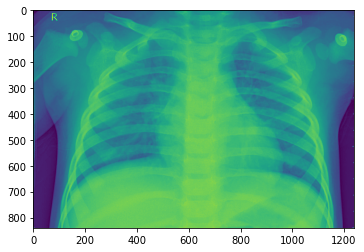

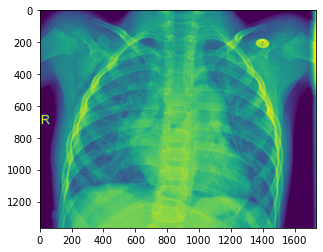

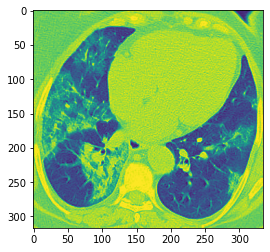

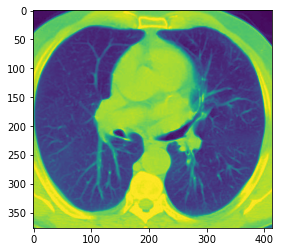

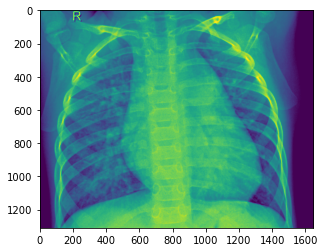

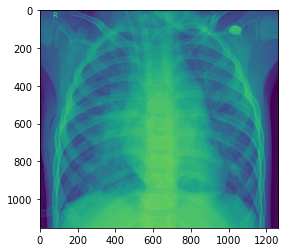

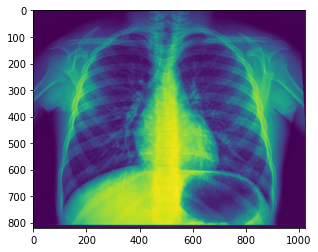

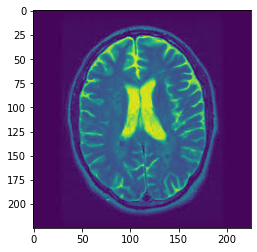

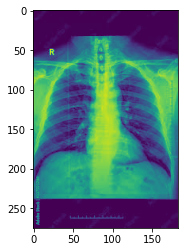

In [118]:
#displaying the images stored in the path
for img in images:
    img_arr=cv2.imread(os.path.join(path,img),0)
    plt.figure()
    plt.imshow(img_arr)

In [96]:
#defining GCD fuction for any 2 numbers
def gcd(a,h):
    while(1):
        temp=a%h
        if(temp==0):
            return h;
        a=h
        h=temp    

In [97]:
#choosing 2 large prime nos say "p,q"
p=37          
q=23
n=p*q
#finding the totient function
totient=(p-1)*(q-1)
e = random.randrange(1, totient)  

In [98]:
#selecting a number "e" such that gcd should be 1
g = gcd(e,totient)
while g!= 1:
    e = random.randrange(1,totient)
    g = gcd(e,totient)

In [112]:
#determining "d" by defining multiplicative inverse
def multiplicative_inverse(e,totient):
    d=None
    i=1
    exit=False
    while not exit:
        temp1=totient*i+1
        d=float(temp1/e)
        d_int=int(d)
        i+=1
        if(d_int==d):
            exit=True
    return int(d)
       
d=multiplicative_inverse(e, totient)

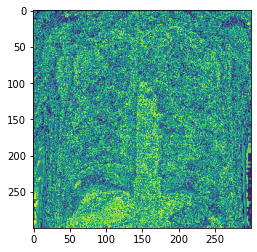

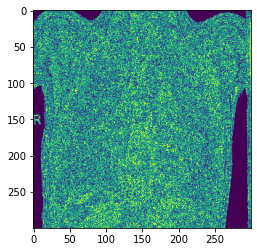

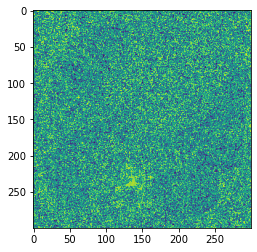

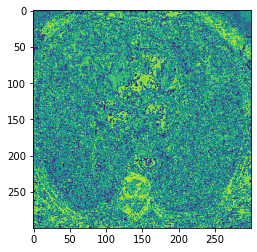

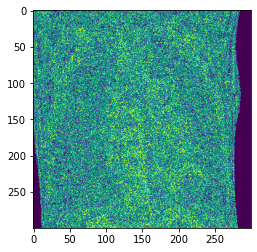

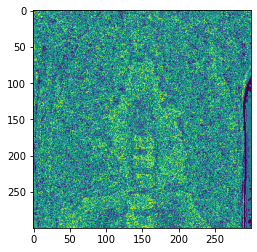

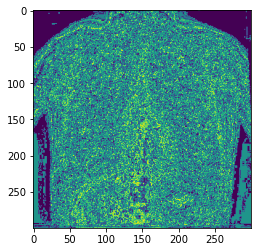

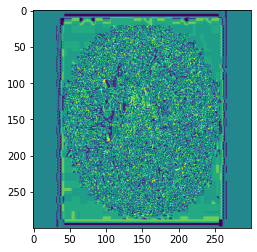

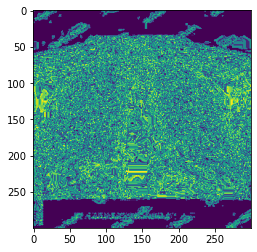

In [114]:
#performing encryption from the found values
encrypted_images=[]
for i in images:
    fig,ax = plt.subplots(figsize=(4,4))
    img_path = os.path.join(path,i)
    img = cv2.imread(img_path,0)
    #resizing the dimensions to 300
    img_resized = cv2.resize(img,(300,300))
    #coverting the images to 1D
    img_1D = img_resized.ravel()
    encrypted_list=[]
    for i in range(0, len(img_1D)):
        current_enc = (int(img_1D[i])**e)% n
        encrypted_list.append(int(current_enc))
    enc_list = np.array(encrypted_list)
    enc_img = enc_list.reshape(300,300)
    encrypted_images.append(enc_img)
    ax.imshow(enc_img)

In [51]:
encrypted_images.shape

(9, 300, 300)

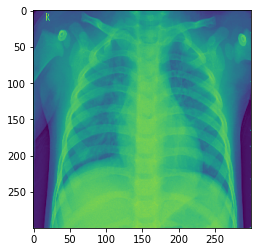

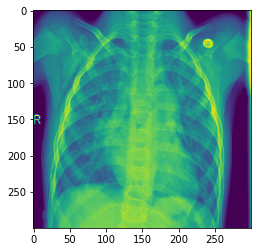

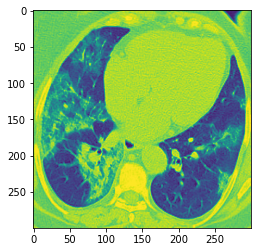

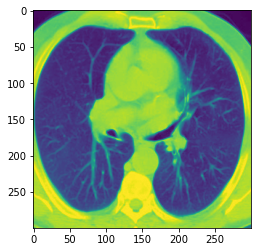

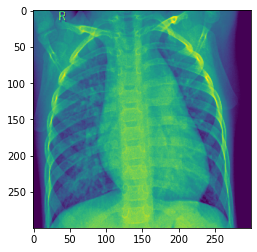

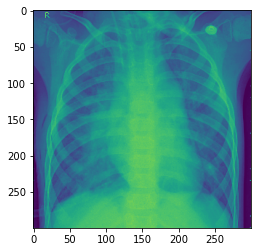

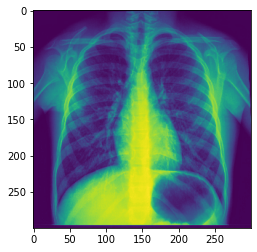

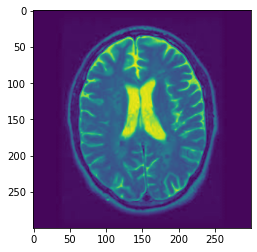

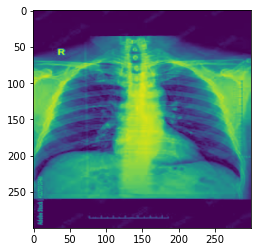

In [117]:
#performing decryption from the found values
for enc_img in encrypted_images:
    fig,ax = plt.subplots(figsize=(4,4))
    image_1D = enc_img.ravel()
    dec_list=[]
    for i in range(0,len(image_1D)):
        current_dec = (int(image_1D[i])**d)%n
        dec_list.append(current_dec)
    dec_list = np.array(dec_list)
    rest_img = dec_list.reshape(300,300)
    ax.imshow(rest_img)